## TMO Exam - BMSTU 2025

In [3]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import max_error, make_scorer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Первые 5 строк датасета:
         x1        x2        x3         y
0  0.135807  0.352670  0.549685  0.315670
1  0.112499  1.001910  0.021861  0.774527
2  0.284491  0.242460  0.351474  0.331960
3  0.210160  0.772853  0.161789  0.723853
4  0.274513  0.450023  0.524428  0.378081


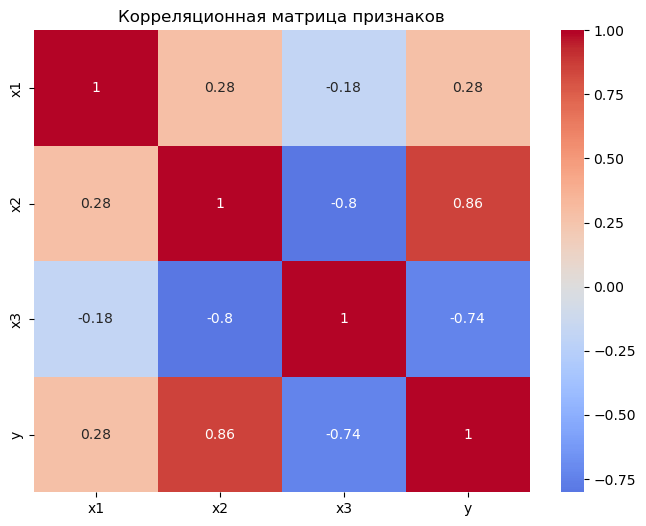

In [4]:
# Загрузка данных
dataframe = pd.read_csv('dataset_04.csv', sep=';')

# Вывод первых строк для проверки
print("Первые 5 строк датасета:")
print(dataframe.head())

# Построение корреляционной матрицы
correlation_matrix = dataframe[['x1', 'x2', 'x3', 'y']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Корреляционная матрица признаков")
plt.show()

### Масштабирование данных ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe[['x1', 'x2', 'x3']])
y = dataframe['y']

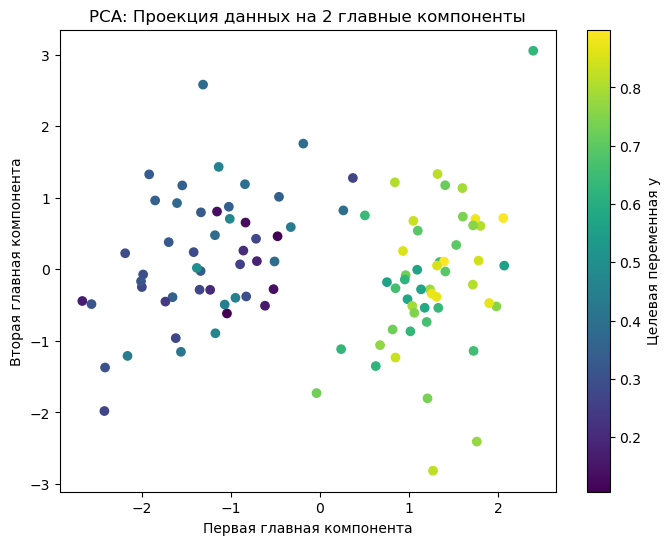

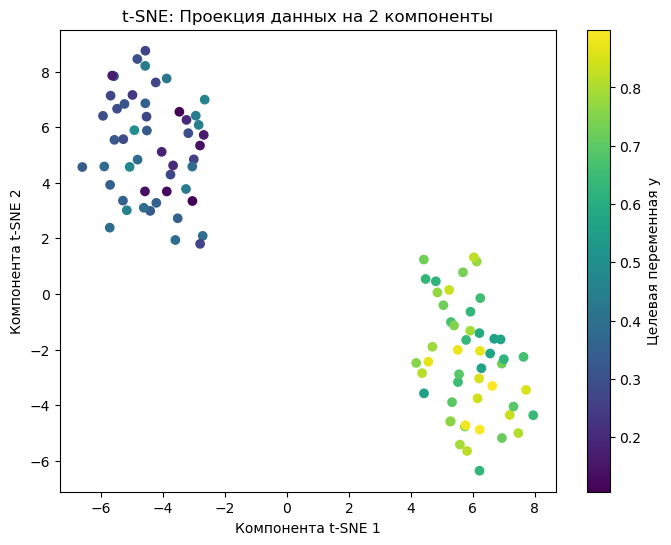

In [5]:
### PCA для регуляризации и визуализации ###
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA: Проекция данных на 2 главные компоненты")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.colorbar(label='Целевая переменная y')
plt.show()

### t-SNE для визуализации ###
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title("t-SNE: Проекция данных на 2 компоненты")
plt.xlabel("Компонента t-SNE 1")
plt.ylabel("Компонента t-SNE 2")
plt.colorbar(label='Целевая переменная y')
plt.show()

In [6]:
### Линейная регрессия с масштабированными данными ###
max_error_scorer = make_scorer(max_error, greater_is_better=False)

### Лин. регрессия просто
max_errors = abs(
    cross_val_score(
        LinearRegression(),
        dataframe[['x1', 'x2', 'x3']],
        dataframe['y'],
        cv=5,
        scoring=max_error_scorer  # Используем нашу кастомную функцию
    )
)
mean_max_error = np.mean(max_errors)

print("\n--- Оценка модели с масштабированными данными ---")
max_errors_scaled = abs(
    cross_val_score(
        LinearRegression(),
        X_scaled,
        y,
        cv=5,
        scoring=max_error_scorer
    )
)
mean_max_error_scaled = np.mean(max_errors_scaled)
print(f"Средний max_error после масштабирования: {mean_max_error_scaled:.4f}")

### Линейная регрессия с PCA ###
print("\n--- Оценка модели с PCA ---")
max_errors_pca = abs(
    cross_val_score(
        LinearRegression(),
        X_pca,
        y,
        cv=5,
        scoring=max_error_scorer
    )
)
mean_max_error_pca = np.mean(max_errors_pca)
print(f"Средний max_error после PCA: {mean_max_error_pca:.4f}")


### Линейная регрессия с t-SNE ###
print("\n--- Оценка модели с t-SNE ---")
max_errors_pca = abs(
    cross_val_score(
        LinearRegression(),
        X_tsne,
        y,
        cv=5,
        scoring=max_error_scorer
    )
)
mean_max_error_tsne = np.mean(max_errors_pca)
print(f"Средний max_error после PCA: {mean_max_error_tsne:.4f}")

### Проверка выполнения условия (max_error ≤ 0.22) ###
final_errors = {
    "LinearRegression (без обработки)": mean_max_error,
    "LinearRegression (масштабирование)": mean_max_error_scaled,
    "LinearRegression (PCA)": mean_max_error_pca,
    "LinearRegression (t-SNE)": mean_max_error_tsne
}

print("\nИтоговые результаты:")
for model, error in final_errors.items():
    print(f"{model}: {error:.4f}")

best_model = min(final_errors, key=final_errors.get)
if final_errors[best_model] <= 0.22:
    print(f"\nУсловие выполнено! Лучшая модель: {best_model} (max_error = {final_errors[best_model]:.4f} ≤ 0.22)")
else:
    print(f"\nУсловие не выполнено. Лучший результат: {best_model} (max_error = {final_errors[best_model]:.4f} > 0.22)")


--- Оценка модели с масштабированными данными ---
Средний max_error после масштабирования: 0.2755

--- Оценка модели с PCA ---
Средний max_error после PCA: 0.2839

--- Оценка модели с t-SNE ---
Средний max_error после PCA: 0.2208

Итоговые результаты:
LinearRegression (без обработки): 0.2755
LinearRegression (масштабирование): 0.2755
LinearRegression (PCA): 0.2839
LinearRegression (t-SNE): 0.2208

Условие не выполнено. Лучший результат: LinearRegression (t-SNE) (max_error = 0.2208 > 0.22)


## Улучшение модели

In [7]:
# Добавляем кластеризацию
kmeans = KMeans(n_clusters=2, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X_tsne)

# Отдельные модели для кластеров
print("\n--- Регрессия по кластерам ---")
for cluster_id in sorted(dataframe['cluster'].unique()):
    cluster_data = dataframe[dataframe['cluster'] == cluster_id]
    scores = cross_val_score(LinearRegression(),
                           cluster_data[['x1','x2','x3']],
                           cluster_data['y'],
                           cv=5,
                           scoring=max_error_scorer)
    print(f"Кластер {cluster_id}: max_error = {np.mean(abs(scores)):.4f}")


--- Регрессия по кластерам ---
Кластер 0: max_error = 0.1997
Кластер 1: max_error = 0.1710


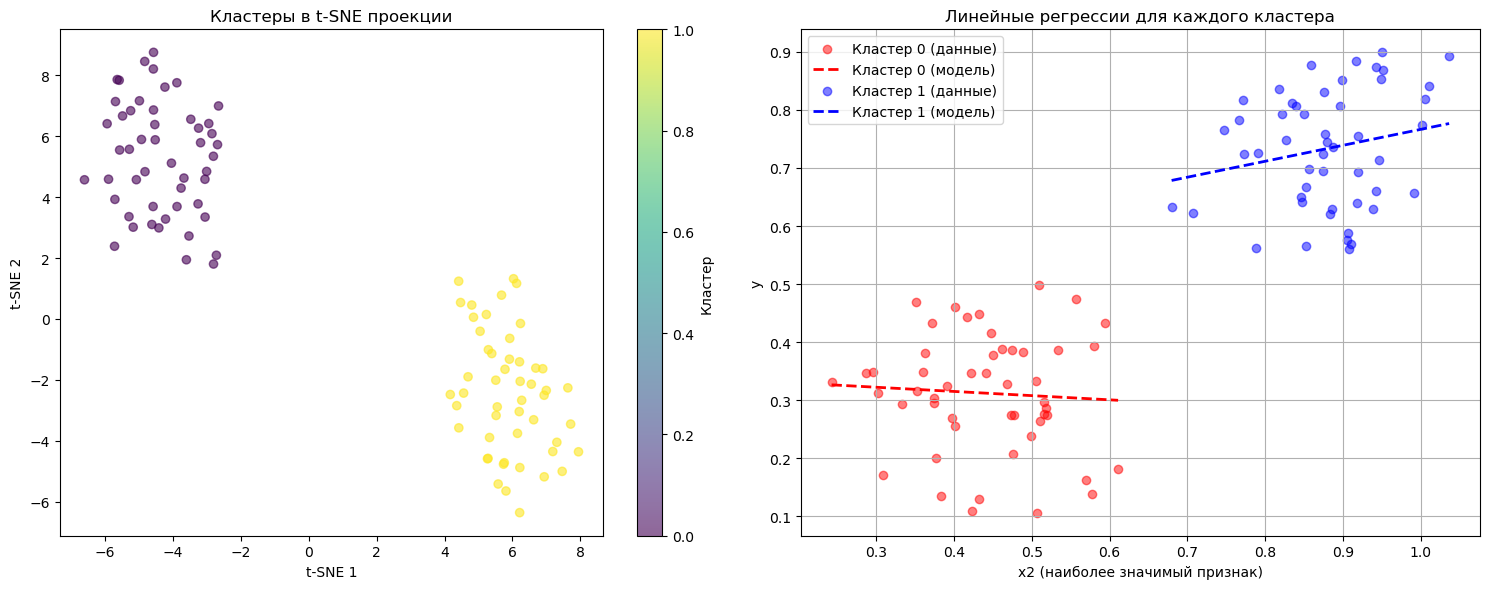

In [8]:
# Визуализация моделей в пространстве t-SNE
plt.figure(figsize=(15, 6))

# 1. Визуализация в пространстве t-SNE
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dataframe['cluster'], cmap='viridis', alpha=0.6)
plt.title('Кластеры в t-SNE проекции')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(scatter, label='Кластер')

# 2. Визуализация регрессионных моделей для каждого кластера
plt.subplot(1, 2, 2)

# Для каждого кластера строим свою модель и визуализацию
colors = ['red', 'blue']
for cluster_id in sorted(dataframe['cluster'].unique()):
    # Получаем данные кластера
    cluster_data = dataframe[dataframe['cluster'] == cluster_id]
    X_cluster = cluster_data[['x1', 'x2', 'x3']]
    y_cluster = cluster_data['y']
    
    # Обучаем модель
    model = LinearRegression().fit(X_cluster, y_cluster)
    
    # Предсказания для визуализации
    x2_range = np.linspace(cluster_data['x2'].min(), cluster_data['x2'].max(), 100)
    x2_pred = pd.DataFrame({
        'x1': [cluster_data['x1'].mean()] * 100,
        'x2': x2_range,
        'x3': [cluster_data['x3'].mean()] * 100
    })
    y_pred = model.predict(x2_pred)
    
    # Визуализация
    plt.scatter(cluster_data['x2'], cluster_data['y'], 
               color=colors[cluster_id], alpha=0.5, 
               label=f'Кластер {cluster_id} (данные)')
    plt.plot(x2_range, y_pred, color=colors[cluster_id], 
            linewidth=2, linestyle='--',
            label=f'Кластер {cluster_id} (модель)')

plt.title('Линейные регрессии для каждого кластера')
plt.xlabel('x2 (наиболее значимый признак)')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Результат: 0.19 и 0.1710